In [ ]:
%%capture
%pip install wget

In [ ]:
#下載字型
import wget
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")


### 均方根誤差(RMSE)
均方根誤差是機器學習中常用的評估指標，它結合了MSE的優點，同時保持了與原始數據相同的單位。讓我們通過一個氣溫預測的範例來理解RMSE的計算和應用。

**什麼是RMSE?**

RMSE是均方誤差(MSE)的平方根。

    - **公式**：RMSE = √(MSE) = √[(1/n) * Σ(y_i - ŷ_i)²]
    - **特點**：保留MSE對大誤差敏感的特性，但單位與原始數據一致

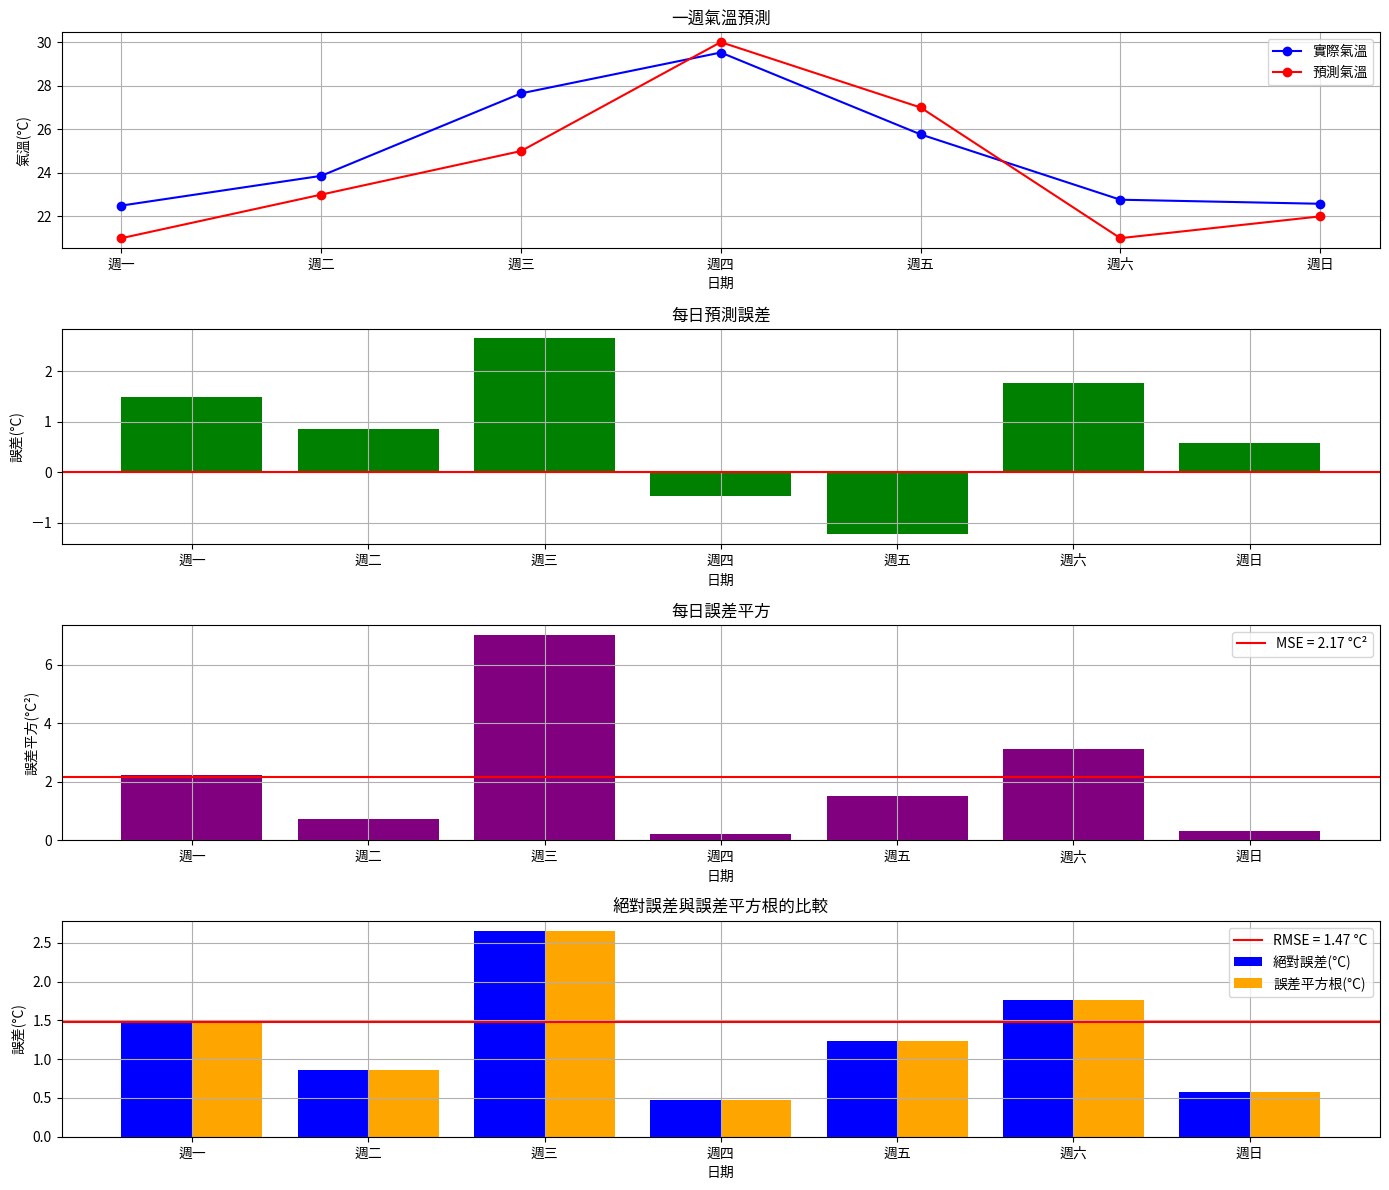

均方誤差(MSE): 2.17 °C²
均方根誤差(RMSE): 1.47 °C

詳細數據:
   日期  實際氣溫(°C)  預測氣溫(°C)  誤差(°C)  誤差平方(°C²)
0  週一     22.50        21    1.50       2.24
1  週二     23.86        23    0.86       0.74
2  週三     27.65        25    2.65       7.01
3  週四     29.52        30   -0.48       0.23
4  週五     25.77        27   -1.23       1.52
5  週六     22.77        21    1.77       3.12
6  週日     22.58        22    0.58       0.34

平均絕對誤差(MAE): 1.29 °C
均方根誤差(RMSE): 1.47 °C

大誤差對RMSE的影響:
僅考慮小誤差日的RMSE: 1.54 °C
考慮所有日子的RMSE: 1.47 °C
大誤差使RMSE增加了: -0.07 °C


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib as mlp
from matplotlib.font_manager import fontManager

fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')

# 步驟1: 建立假數據集 - 一週的氣溫預測(攝氏度)
np.random.seed(42)  # 設定隨機種子以確保結果可重現
days = np.arange(1, 8)  # 一週7天
day_names = ['週一', '週二', '週三', '週四', '週五', '週六', '週日']

# 真實氣溫：模擬一週的溫度變化
actual_temp = np.array([22, 24, 27, 28, 26, 23, 21])
# 加入一些隨機變化
actual_temp = actual_temp + np.random.normal(0, 1, 7)

# 步驟2: 創建預測模型(這裡用簡單公式模擬預測結果)
predicted_temp = np.array([21, 23, 25, 30, 27, 21, 22])  # 預測氣溫
# 週四(第4天)預測偏高，週六(第6天)預測偏低

# 步驟3: 計算MSE和RMSE
mse = mean_squared_error(actual_temp, predicted_temp)
rmse = np.sqrt(mse)  # RMSE是MSE的平方根

# 步驟4: 創建數據框以便於展示
df = pd.DataFrame({
    '日期': day_names,
    '實際氣溫(°C)': actual_temp,
    '預測氣溫(°C)': predicted_temp,
    '誤差(°C)': actual_temp - predicted_temp,
    '誤差平方(°C²)': (actual_temp - predicted_temp) ** 2
})

# 步驟5: 視覺化結果
plt.figure(figsize=(14, 12))

# 繪製實際氣溫和預測氣溫
plt.subplot(4, 1, 1)
plt.plot(days, actual_temp, 'o-', color='blue', label='實際氣溫')
plt.plot(days, predicted_temp, 'o-', color='red', label='預測氣溫')
plt.title('一週氣溫預測')
plt.xlabel('日期')
plt.ylabel('氣溫(°C)')
plt.legend()
plt.grid(True)
plt.xticks(days, day_names)

# 繪製誤差
plt.subplot(4, 1, 2)
plt.bar(days, actual_temp - predicted_temp, color='green')
plt.title('每日預測誤差')
plt.xlabel('日期')
plt.ylabel('誤差(°C)')
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(True)
plt.xticks(days, day_names)

# 繪製誤差平方
plt.subplot(4, 1, 3)
error_squared = (actual_temp - predicted_temp) ** 2
plt.bar(days, error_squared, color='purple')
plt.axhline(y=mse, color='r', linestyle='-', label=f'MSE = {mse:.2f} °C²')
plt.title('每日誤差平方')
plt.xlabel('日期')
plt.ylabel('誤差平方(°C²)')
plt.legend()
plt.grid(True)
plt.xticks(days, day_names)

# 繪製誤差、誤差平方和RMSE的比較
plt.subplot(4, 1, 4)
abs_error = np.abs(actual_temp - predicted_temp)
plt.bar(days - 0.2, abs_error, width=0.4, color='blue', label='絕對誤差(°C)')
plt.bar(days + 0.2, np.sqrt(error_squared), width=0.4, color='orange', label='誤差平方根(°C)')
plt.axhline(y=rmse, color='r', linestyle='-', label=f'RMSE = {rmse:.2f} °C')
plt.title('絕對誤差與誤差平方根的比較')
plt.xlabel('日期')
plt.ylabel('誤差(°C)')
plt.legend()
plt.grid(True)
plt.xticks(days, day_names)

plt.tight_layout()
plt.show()

# 輸出結果
print(f"均方誤差(MSE): {mse:.2f} °C²")
print(f"均方根誤差(RMSE): {rmse:.2f} °C")
print("\n詳細數據:")
print(df.round(2))

# 對比MAE與RMSE
mae = np.mean(np.abs(actual_temp - predicted_temp))
print(f"\n平均絕對誤差(MAE): {mae:.2f} °C")
print(f"均方根誤差(RMSE): {rmse:.2f} °C")

# 展示大誤差對RMSE的影響
print("\n大誤差對RMSE的影響:")
large_error_days = ['週四', '週六']  # 誤差較大的日子
small_error_days = ['週一', '週二', '週三', '週五', '週日']  # 誤差較小的日子

# 計算僅包含小誤差日的RMSE
small_error_indices = [0, 1, 2, 4, 6]  # 對應small_error_days的索引
small_error_rmse = np.sqrt(mean_squared_error(
    actual_temp[small_error_indices], 
    predicted_temp[small_error_indices]
))

print(f"僅考慮小誤差日的RMSE: {small_error_rmse:.2f} °C")
print(f"考慮所有日子的RMSE: {rmse:.2f} °C")
print(f"大誤差使RMSE增加了: {(rmse - small_error_rmse):.2f} °C")


### RMSE的特點與應用
### RMSE的特點與應用

RMSE結合了MSE和MAE的優點，在機器學習中被廣泛應用於評估回歸模型。讓我們來理解它的特點：  

**三種誤差指標的對比**

| 特性           | RMSE                          | MSE                          | MAE                          |
|----------------|-------------------------------|------------------------------|------------------------------|
| **公式**       | √[(1/n) * Σ(y_i - ŷ_i)²]     | (1/n) * Σ(y_i - ŷ_i)²       | (1/n) * Σ|y_i - ŷ_i|        |
| **單位**       | 與原始數據相同                | 原始數據單位的平方           | 與原始數據相同               |
| **對大誤差的敏感度** | 高                           | 高                           | 中等                         |
| **解釋性**     | 良好，易理解                  | 較難直觀理解                 | 最易理解                     |
| **適用場景**   | 需要對大誤差敏感且保持原單位   | 大誤差代價高的情況           | 需要均勻處理所有誤差         |

### RMSE的主要優點
- **保持原始單位**：與原始數據單位一致，便於直觀解釋
- **對大誤差敏感**：通過平方和開方操作，對離群值給予更大的懲罰
- **廣泛應用**：在各種預測任務中被廣泛用作標準評估指標

### 常見應用場景
- **氣象預測**：溫度、降水量等數值預測，RMSE可直接反映預測的平均偏差程度
- **金融模型**：資產價格、風險評估等模型評估
- **推薦系統**：用戶評分預測的誤差度量
- **能源需求預測**：電力、燃氣等需求預測評估

### 學習重點
1. RMSE = √MSE，它結合了MSE對大誤差敏感的特性，同時保持了與原始數據相同的單位
2. RMSE總是大於或等於MAE，當所有誤差大小相同時，兩者相等
3. RMSE特別適合用於需要對大誤差敏感且希望保持原始數據單位的場景
4. 在上面的氣溫預測例子中，RMSE值較MAE值更大，主要是因為週四和週六的大誤差
5. 在模型選擇時，需要根據業務需求決定使用哪種評估指標，有時候可能需要同時考慮多種指標